In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import f1_score
import glob
import os
%matplotlib inline

## Model

In [3]:
def conf_mat(pred,truth):
    res = [0,0,0,0]
    a = 0
    
    for i in range(len(truth)):
        if truth[i] == 1:
            if truth[i] == pred[i]:
                a = 0
            else:
                a = 2
                
        else:
            if truth[i] == pred[i]:
                a = 1
            else:
                a = 3
                
        res[a] = res[a] + 1
     
    print(res)
    return res

## Multi-dataset Model

In [3]:
input_dir = './../train/KPI/'

summary = pd.DataFrame(columns=['KPI', 'TP', 'TN', 'FP', 'FN', 'PRECISION', 'RECALL', 'F1_SCORE'])

for fname in os.listdir(input_dir):
    df  = pd.read_csv(os.path.join(input_dir, fname), index_col='timestamp')
    kpi_name = df['KPI ID'].values[0]
    print(kpi_name)
    df = df.drop(['KPI ID'], axis=1)
    
    # Normalize Values
    normalized_df=(df-df.min())/(df.max()-df.min())
    normalized_df = normalized_df.astype({'label': 'int64'})
    
    # Split to Train and Test
    train_set, test_set= np.split(normalized_df, [int(.75 *len(normalized_df))])
    
    # Format Train and Test
    X = np.array(train_set['value']).reshape(-1, 1)
    y = np.array(train_set['label'])
    x_test = np.array(test_set['value']).reshape(-1,1)
    y_test = np.array(test_set['label'])
    
    
    # Check Valid Train Dataset
    if len(np.unique(y)) > 1:

        # Train Model
        model = tree.DecisionTreeClassifier()
        model.fit(X,y)

        # Make Predictions
        predictions = model.predict(x_test)

        # Compute Confusion Matrix
        cf = conf_mat(predictions,y_test) 

        # F1-Score
        prec = 0
        rec = 0
        f1 = 0
        if (cf[0] + cf[2]) != 0:
            prec = cf[0] / (cf[0] + cf[2])
        if (cf[0] + cf[3]) != 0:
            rec  = cf[0] / (cf[0] + cf[3])
        if (prec + rec) != 0:
            f1   = 2 * (prec * rec / (prec+rec))

    #     print(f1_score(predictions,y_test))


        summary = summary.append({'KPI': kpi_name, 
                                   'TP': cf[0],  
                                   'TN': cf[1], 
                                   'FP': cf[2], 
                                   'FN': cf[3], 
                                   'PRECISION': prec, 
                                   'RECALL': rec,     
                                   'F1_SCORE': f1 }, ignore_index=True)
        
    else:
        summary = summary.append({'KPI': kpi_name, 
                                   'TP': None,  
                                   'TN': None, 
                                   'FP': None, 
                                   'FN': None, 
                                   'PRECISION': None, 
                                   'RECALL': None,     
                                   'F1_SCORE': None }, ignore_index=True)
    

a40b1df87e3f1c87
[22, 34376, 84, 0]
b3b2e6d1a791d63a
[0, 2046, 0, 16]
da403e4e3f87c9e0
[149, 31997, 113, 0]
046ec29ddf80d62e
[0, 2196, 0, 0]
18fbb1d5a5dc099d
[15, 32154, 36, 77]
09513ae3e75778a3
[0, 32088, 128, 27]
07927a9a18fa19ae
[7, 2667, 17, 49]
cff6d3c01e6a6bfa
[26, 36613, 263, 6]
54e8a140f6237526
[0, 2059, 0, 3]
c58bfcbacb2822d1
[0, 32089, 47, 31]
7c189dd36f048a6c
[17, 36843, 63, 0]
8bef9af9a922e0b3
[9, 32234, 67, 54]
40e25005ff8992bd
[14, 24904, 146, 0]
76f4550c43334374
[0, 2186, 4, 6]
affb01ca2b4f0b45
[19, 36786, 74, 41]
88cf3a776ba00e7c
[149, 15009, 662, 539]
9bd90500bfd11edb
[0, 32154, 0, 0]
e0770391decc44ce
[2483, 34047, 223, 3]
8a20c229e9860d0c
769894baefea4e9e
[0, 2190, 6, 0]
1c35dbf57f55f5e4
[2588, 27695, 124, 1807]
9ee5879409dccef9
[39, 15107, 743, 474]
71595dd7171f4540
[10, 36637, 267, 3]
8c892e5525f3e491
[2452, 34067, 234, 0]
a5bf5d65261d859a
[4, 32160, 6, 0]
02e99bd4f6cfb33f
[618, 30554, 764, 205]


In [4]:
summary.to_csv('DT_Result.csv')

## Single Class

In [24]:
input_dir = './../../train/KPI/'
fname = 'train_e0770391decc44ce.csv'

summary = pd.DataFrame(columns=['KPI', 'TP', 'TN', 'FP', 'FN', 'PRECISION', 'RECALL', 'F1_SCORE'])

df  = pd.read_csv(os.path.join(input_dir, fname), index_col='timestamp')
kpi_name = df['KPI ID'].values[0]
print(kpi_name)
df = df.drop(['KPI ID'], axis=1)

# Remove fault
df = df[ df.index < '2017-07-09 13:50:00']

# Normalize Values
# normalized_df=(df-df.min())/(df.max()-df.min())
# normalized_df = normalized_df.astype({'label': 'int64'})

# # Split to Train and Test
# train_set, test_set= np.split(normalized_df, [int(.75 *len(normalized_df))])

train_set, test_set= np.split(df, [int(.50 *len(df))])


# Format Train and Test
X = np.array(train_set['value']).reshape(-1, 1)
y = np.array(train_set['label'])
x_test = np.array(test_set['value']).reshape(-1,1)
y_test = np.array(test_set['label'])


# Check Valid Train Dataset
if len(np.unique(y)) > 1:

    # Train Model
    model = tree.DecisionTreeClassifier()
    model.fit(X,y)

    # Make Predictions
    predictions = model.predict(x_test)

    # Compute Confusion Matrix
    cf = conf_mat(predictions,y_test) 

    # F1-Score
    prec = 0
    rec = 0
    f1 = 0
    if (cf[0] + cf[2]) != 0:
        prec = cf[0] / (cf[0] + cf[2])
    if (cf[0] + cf[3]) != 0:
        rec  = cf[0] / (cf[0] + cf[3])
    if (prec + rec) != 0:
        f1   = 2 * (prec * rec / (prec+rec))


    summary = summary.append({'KPI': kpi_name, 
                               'TP': cf[0],  
                               'TN': cf[1], 
                               'FP': cf[2], 
                               'FN': cf[3], 
                               'PRECISION': prec, 
                               'RECALL': rec,     
                               'F1_SCORE': f1 }, ignore_index=True)

else:
    summary = summary.append({'KPI': kpi_name, 
                               'TP': None,  
                               'TN': None, 
                               'FP': None, 
                               'FN': None, 
                               'PRECISION': None, 
                               'RECALL': None,     
                               'F1_SCORE': None }, ignore_index=True)

e0770391decc44ce
[180, 69477, 100, 155]


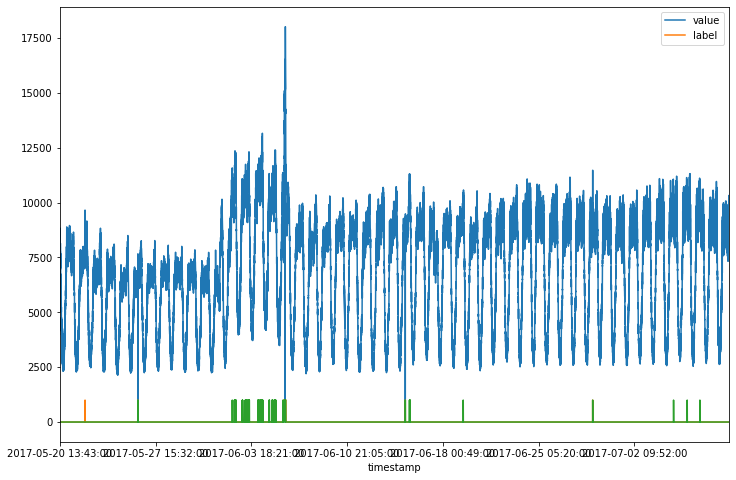

In [39]:
# test_set['label'] = test_set['label'] * 1000
test_set.plot(kind='line',figsize=(12,8))
plt.plot(np.squeeze(df_pred.values.T)*1000)

In [34]:
df_pred = pd.DataFrame(predictions, index=test_set.index)

In [27]:
test_set

,value,label
timestamp,,
2017-05-20 13:43:00,8001.0,0
2017-05-20 13:44:00,8170.0,0
2017-05-20 13:45:00,8323.0,0
2017-05-20 13:46:00,8194.0,0
2017-05-20 13:47:00,8523.0,0
...,...,...
2017-07-09 13:45:00,8969.0,0
2017-07-09 13:46:00,9019.0,0
2017-07-09 13:47:00,9531.0,0


In [38]:
np.squeeze(df_pred.values.T)

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
f1_score(np.squeeze(df_pred.values.T), test_set.label/1000)

0.5853658536585366

In [45]:
test_set.groupby(test_set.label).count()

,value
label,
0,69632
1000,280
